In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import os
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [2]:
def get_title(filename):
    """
     >>> get_title("logs/0613/0613-q1-0000.train")
     '0613-q1-0000'
     """
    return os.path.splitext(os.path.basename(filename))[0]
def get_df_from_file(f):
    df = pd.read_csv(f)
    df = df[df["is_end_of_epoch"]].reset_index()
    return df

In [3]:
result_files = sorted(glob("../../../data/logs/0710*nocl*.train"))
titles = [get_title(f) for f in result_files]
dfes = (get_df_from_file(f) for f in result_files)

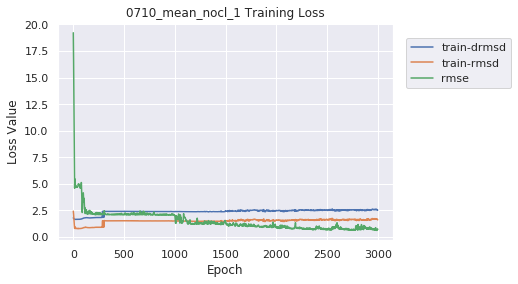

In [5]:
def do_plot(df, title):
    dfval = df[df["is_val"]]
    dftrain = df[df["is_val"] != True]
    sns.lineplot(x=dftrain.index, y="drmsd", data=dftrain, label="train-drmsd")
    sns.lineplot(x=dfval.index, y="drmsd", data=dfval, label="val-drmsd",color="lightblue")
    sns.lineplot(x=dftrain.index, y="rmsd", data=dftrain, label="train-rmsd")
    sns.lineplot(x=dfval.index, y="rmsd", data=dfval, label="val-rmsd", color="orange")
    sns.lineplot(x=dftrain.index, y="rmse", data=dftrain, label="rmse")
#     sns.lineplot(x=dftrain.index, y="combined", data=dftrain, label="drmsd+mse")
    plt.ylabel("Loss Value")
    plt.xlabel("Epoch")
    plt.legend(loc=(1.04,.7))
    plt.title("{} Training Loss".format(title))
#     plt.savefig("../figs/transtrain.pdf", pad_inches=1, bbox_inches="tight")
do_plot(get_df_from_file(result_files[0]), titles[0])

In [6]:
min_key = "rmsd"
mins = []
for df, title in zip(dfes, titles):
    try:
        dfval = df
    except KeyError as e:
        print(e)
        continue
    try:
        row = dfval[dfval[min_key] == dfval[min_key].min()]
    except KeyError:
        print(title)
        continue
    row["title"] = title[:]
    mins.append(row)
mins_df = pd.concat(mins)
mins_df.sort_values(min_key, inplace=True)
mins_df

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,drmsd,rmse,rmsd,lr,is_val,is_end_of_epoch,time,title
53,1.441261,1.666250,2.789147,0.784176,0,False,True,1.562812e+09,0710_mean_nocl_9
71,1.456263,1.666658,3.446205,0.785453,0,False,True,1.562830e+09,0710_mean_nocl_12
48,1.566147,1.658863,4.539401,0.785840,0,False,True,1.562850e+09,0710_mean_nocl_15
44,1.610095,1.655690,4.761408,0.785958,0,False,True,1.562817e+09,0710_mean_nocl_10
42,1.567211,1.659806,4.546286,0.786689,0,False,True,1.562786e+09,0710_mean_nocl_4
37,1.619322,1.657086,4.765923,0.787691,0,False,True,1.562780e+09,0710_mean_nocl_3
37,1.638701,1.655649,4.821206,0.787712,0,False,True,1.562802e+09,0710_mean_nocl_7
36,1.631730,1.656231,4.802968,0.787759,0,False,True,1.562774e+09,0710_mean_nocl_2
41,1.594604,1.659271,4.742578,0.787958,0,False,True,1.562793e+09,0710_mean_nocl_5
37,1.632037,1.656835,4.661772,0.788278,0,False,True,1.562809e+09,0710_mean_nocl_8


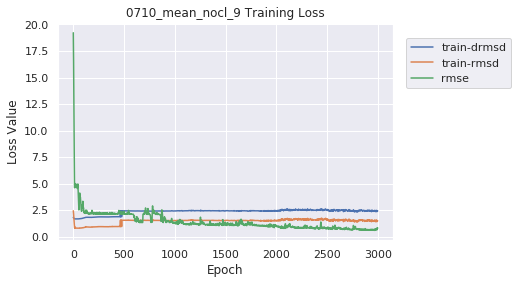

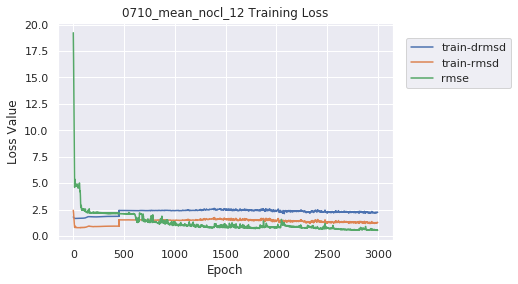

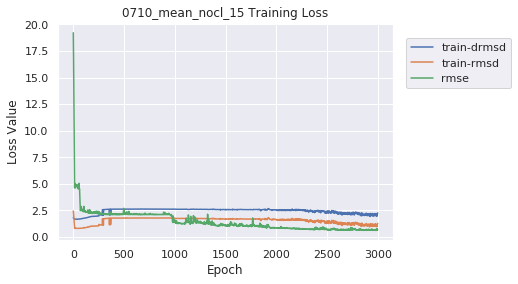

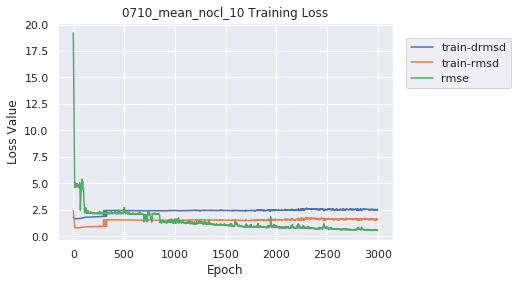

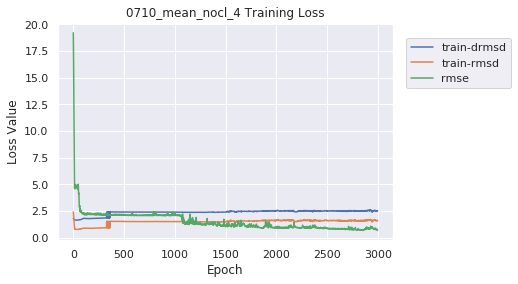

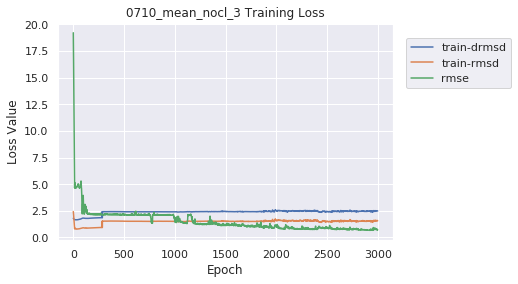

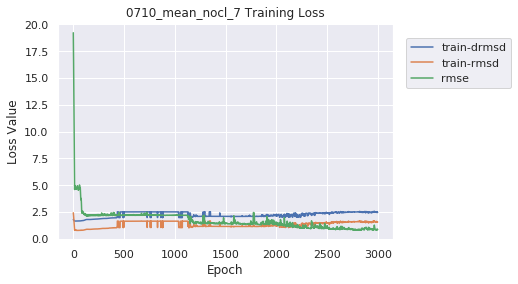

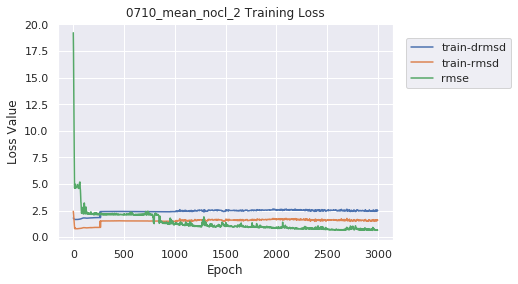

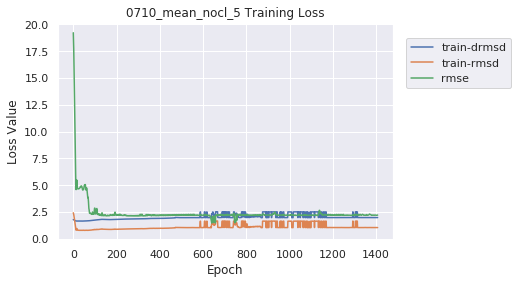

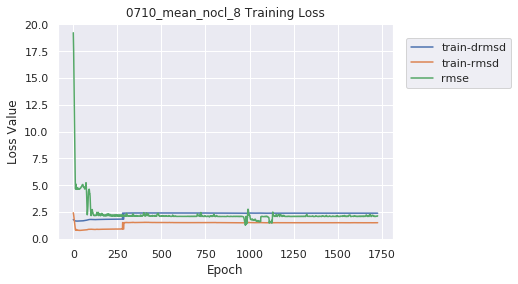

In [7]:
names =  [t for t in mins_df["title"][:10]]
for n in names:
    loc = None
    for i in range(len(result_files)):
        if n == os.path.splitext(os.path.basename(result_files[i]))[0]:
            loc = i
    do_plot(get_df_from_file(result_files[loc]), titles[loc])
    plt.show()

In [15]:
mean_rmsds = mins_df[mins_df["title"].str.contains("mean")]["rmsd"].values[:-1]
rand_rmsds = mins_df[mins_df["title"].str.contains("rand")]["rmsd"].values
mean_rmses = mins_df[mins_df["title"].str.contains("mean")]["rmse"].values[:-1]
rand_rmses = mins_df[mins_df["title"].str.contains("rand")]["rmse"].values

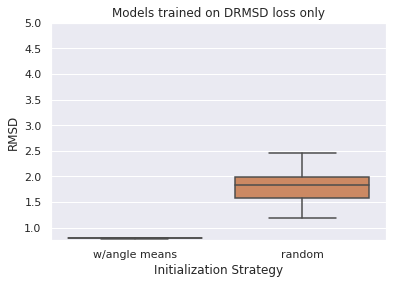

In [29]:
sns.boxplot(x=["w/angle means", "random"], y=[mean_rmsds, rand_rmsds], showfliers=False)
plt.ylabel("RMSD")
plt.xlabel("Initialization Strategy")
plt.ylim((.75, 5))
plt.title("Models trained on DRMSD loss only")
plt.savefig("model_overfit_initialization_strategies_drmsdonly_rmsd.png", dpi=300)
plt.savefig("model_overfit_initialization_strategies_drmsdonly_rmsd.svg")

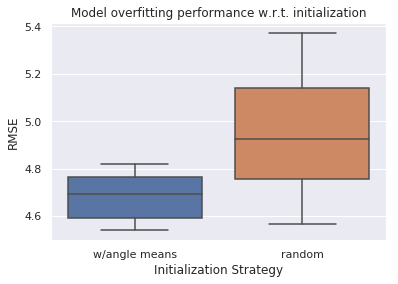

In [28]:
sns.boxplot(x=["w/angle means", "random"], y=[mean_rmses, rand_rmses], showfliers=False)
plt.ylabel("RMSE")
plt.xlabel("Initialization Strategy")
plt.title("Model overfitting performance w.r.t. initialization")
plt.savefig("model_overfit_initialization_strategies_drmsdonly_rmse.png")
plt.savefig("model_overfit_initialization_strategies_drmsdonly_rmse.svg")

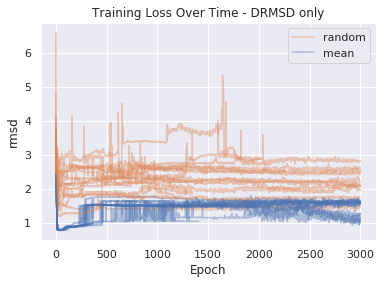

In [32]:
dfes_mean = (get_df_from_file(f) for f in result_files if "mean" in f)    
dfes_rand = (get_df_from_file(f) for f in result_files if "rand" in f)
first = True
for dm, dr in zip(dfes_mean, dfes_rand):
    if first:
        lr = "random"
        lm = "mean"
        first = False
    else:
        lr = None
        lm = None
    try:
        sns.lineplot(x=dr.index, y="rmsd", data=dr, alpha=0.4, color="C1", label=lr)
    except ValueError:
        pass
    try:
        sns.lineplot(x=dm.index, y="rmsd", data=dm, alpha=0.4, color="C0", label=lm)
    except ValueError:
        continue
plt.legend()
plt.title("Training Loss Over Time - DRMSD only")
plt.xlabel("Epoch")
plt.savefig("mean_vs_random_training_over_time_drmsdonly.png", dpi=300)
plt.savefig("mean_vs_random_training_over_time_drmsdonly.svg")